# Evaluating Cell Type Transitions

This notebook evaluates the previously computed couplings w.r.t. to cell type transitions

In [2]:
import numpy as np
import anndata
import pandas as pd
import scanpy as sc
import scipy
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import sys,os
sys.path.append('/home/mgander/mouse_atlas')
import c2

In [3]:
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

In [4]:
Path="/home/mgander/mouse_atlas/data"
ts=['E3.5', 'E4.5', 'E5.25', 'E5.5', 'E6.25', 'E6.5', 'E6.75', 'E7.0', 'E7.25', 'E7.5', 'E7.75', 'E8.0', 'E8.25', 'E8.5a', 'E8.5b', 'E9.5', 'E10.5', 'E11.5', 'E12.5', 'E13.5']

## Compare by correlation

In [12]:
def correlate(T0, T1):
    # Check that indices match
    if list(T0.index)!=list(T1.index) or list(T0.columns)!=list(T1.columns):
        print('Error: Indices do not match')
        return(None)
    else:
        T0=T0.values.flatten()
        T1=T1.values.flatten()
        df=pd.DataFrame({'T0':T0, 'T1':T1})
        cor=scipy.stats.pearsonr(T0, T1)
        return(df, cor[0])

### Correlate each to moscot full-rank

In [13]:
cors=[]
# Check that all the cells are ordered the same in each map:
for i in range(13):
    ts0=ts[i]
    ts1=ts[i+1]
    print(ts0)
    T_WOT=pd.read_pickle(f'{Path}/WOT_maps/Ts/Transitions_{ts0}_{ts1}.pkl')
    T_moscot=pd.read_pickle(f'{Path}/moscot_maps/Ts/Transitions_{ts0}_{ts1}.pkl')
    
    cor=correlate(T_WOT, T_moscot)
    cors.append(cor)

E3.5
E4.5
E5.25
E5.5
E6.25
E6.5
E6.75
E7.0
E7.25
E7.5
E7.75
E8.0
E8.25


In [15]:
df=pd.DataFrame({'Starting time point':ts[:13], 'Pearson R':cors})
df

,Method,Starting time point,Pearson R
0,WOT,E3.5,0.848008
1,WOT,E4.5,0.938706
2,WOT,E5.25,0.936463
3,WOT,E5.5,0.982532
4,WOT,E6.25,0.971355
5,WOT,E6.5,0.964562
6,WOT,E6.75,0.969682
7,WOT,E7.0,0.935473
8,WOT,E7.25,0.972956
9,WOT,E7.5,0.975845


Text(0, 0.5, '')

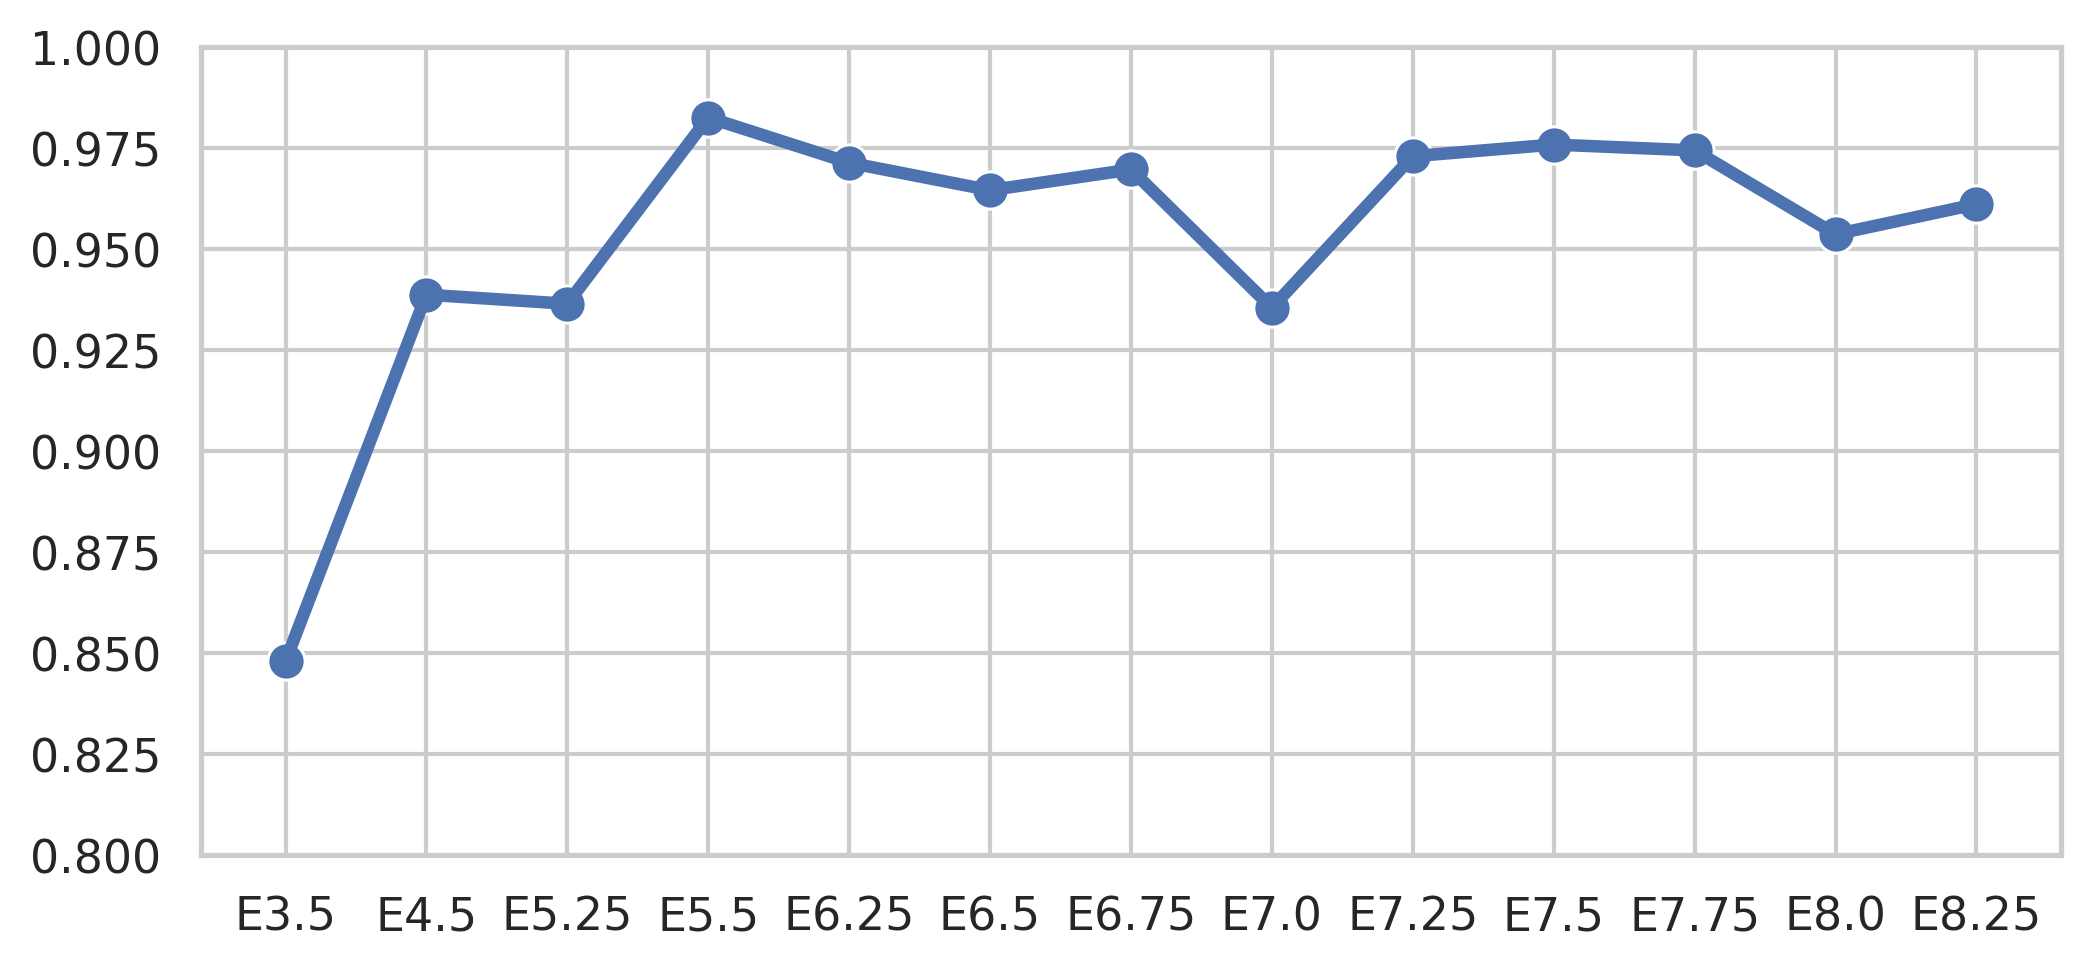

In [16]:
sns.set(rc={'figure.figsize':(8,3.5)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300
sns.lineplot(data=df, x='Starting time point', y='Pearson R', linewidth=3)
sns.scatterplot(data=df, x='Starting time point', y='Pearson R', marker='o', s=80)
plt.ylim(0.8, 1.0)
plt.xlabel('')
plt.ylabel('')

# Scatter-plot some time-points

In [95]:
i=0

ts0=ts[i]
ts1=ts[i+1]
print(ts0)

T_WOT=pd.read_pickle(f'{Path}/WOT_maps/Ts/Transitions_{ts0}_{ts1}.pkl')
T_moscot=pd.read_pickle(f'{Path}/moscot_maps/Ts/Transitions_{ts0}_{ts1}.pkl')

E3.5


In [83]:
cut=10**-3
df=pd.DataFrame({'moscot':T_moscot.values.flatten(), 'WOT':T_WOT.values.flatten()})
# Exclude if both have it smaller then 10**-10 to make plotting not break (due to it else being up to 10M points)
df=df[(df['moscot']>cut)&(df[method]>cut)].copy()
df

,moscot,WOT
53,0.155791,0.037141
79,0.018221,0.002833
133,0.090974,0.069215
194,0.848060,0.431182
269,0.022065,0.001335
...,...,...
5768,0.005333,0.006654
5795,0.329727,0.390299
5803,0.219977,0.031064
5898,0.146313,0.053545


In [87]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

Text(0, 0.5, '')

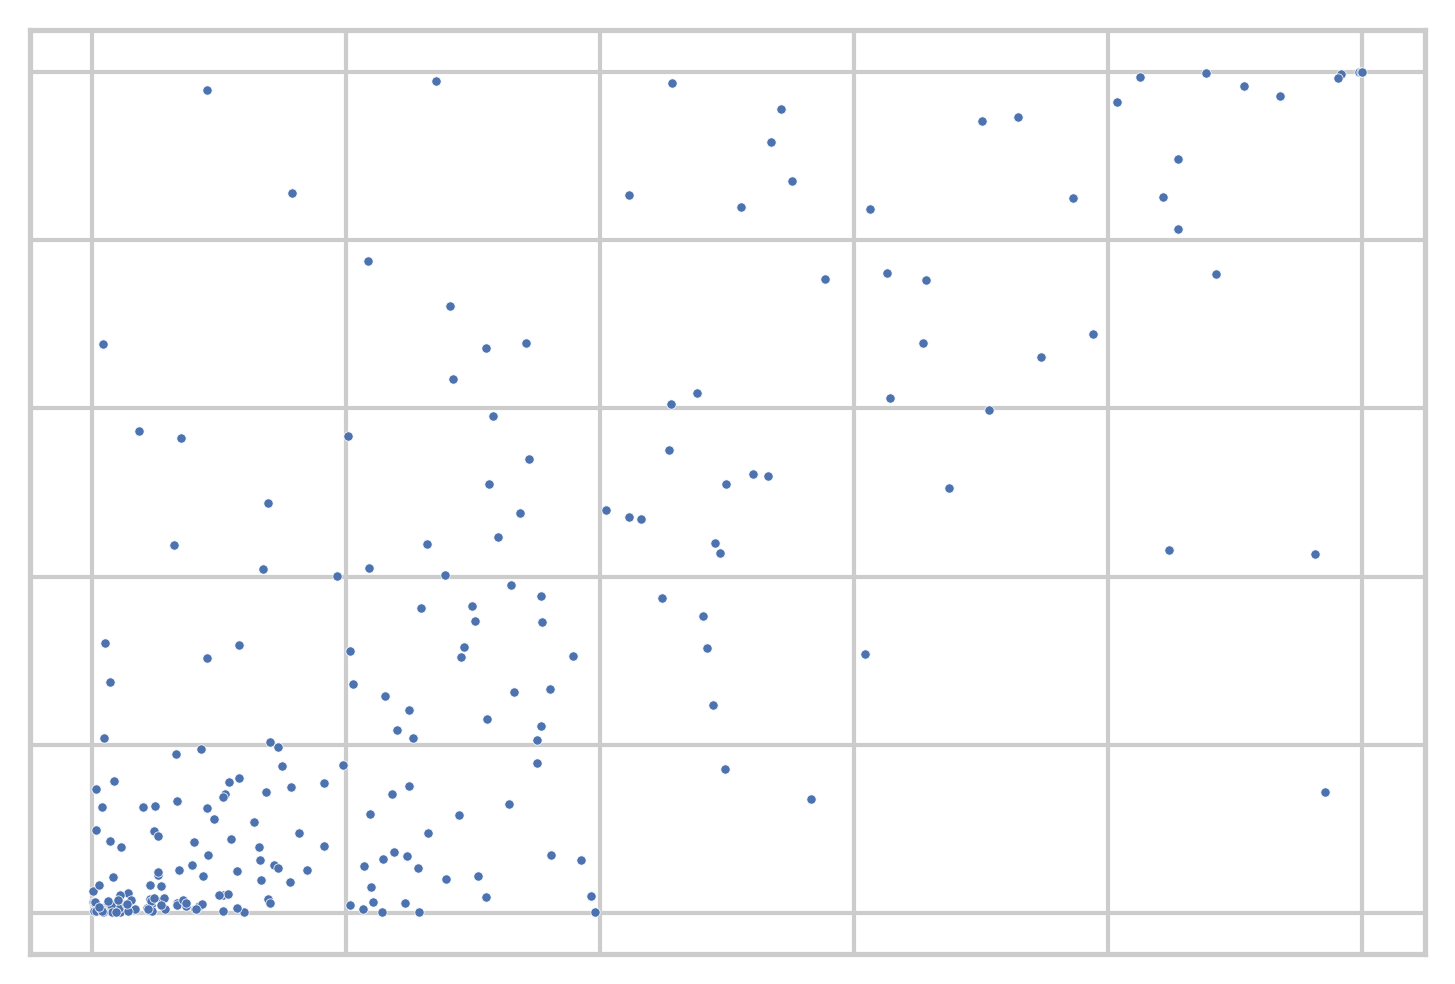

In [91]:
g=sns.scatterplot(data=df, x='moscot', y='WOT', s=5)
g.set_xticklabels([])
g.set_yticklabels([])
plt.xlabel('')
plt.ylabel('')
#ticks=np.linspace(0,1,6)
#plt.yticks(ticks=ticks, labels=['' for a in ticks], rotation='vertical')

In [90]:
scipy.stats.pearsonr(df['moscot'], df['WOT'])

(0.772741818397095, 2.821081834397451e-50)

## Compare cell type transitions

In [61]:
cors=[]
for i in range(13):
    ts0=ts[i]
    ts1=ts[i+1]
    print(ts0)

    CT_WOT=pd.read_pickle(f'{Path}/WOT_maps/WOT_like_CTs/{ts0}_{ts1}_cell_type_transitions.pkl')
    CT_moscot=pd.read_pickle(f'{Path}/moscot_maps/WOT_like_CTs/{ts0}_{ts1}_cell_type_transitions.pkl')
    
    df, cor=correlate(CT_WOT, CT_moscot)
    cors.append(cor)
dfc=pd.DataFrame({'Starting time point':ts[:13], 'Pearson R':cors})
dfc

E3.5
WOT
E4.5
WOT
E5.25
WOT
E5.5
WOT
E6.25
WOT
E6.5
WOT
E6.75
WOT
E7.0
WOT
E7.25
WOT
E7.5
WOT
E7.75
WOT
E8.0
WOT
E8.25
WOT


/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [79]:
sns.set(rc={'figure.figsize':(8,2.8)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

In [80]:
df['Pearson R'].iloc[0]=-1

/tmp/ipykernel_4693/4055944243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pearson R'].iloc[0]=-1


Text(0, 0.5, '')

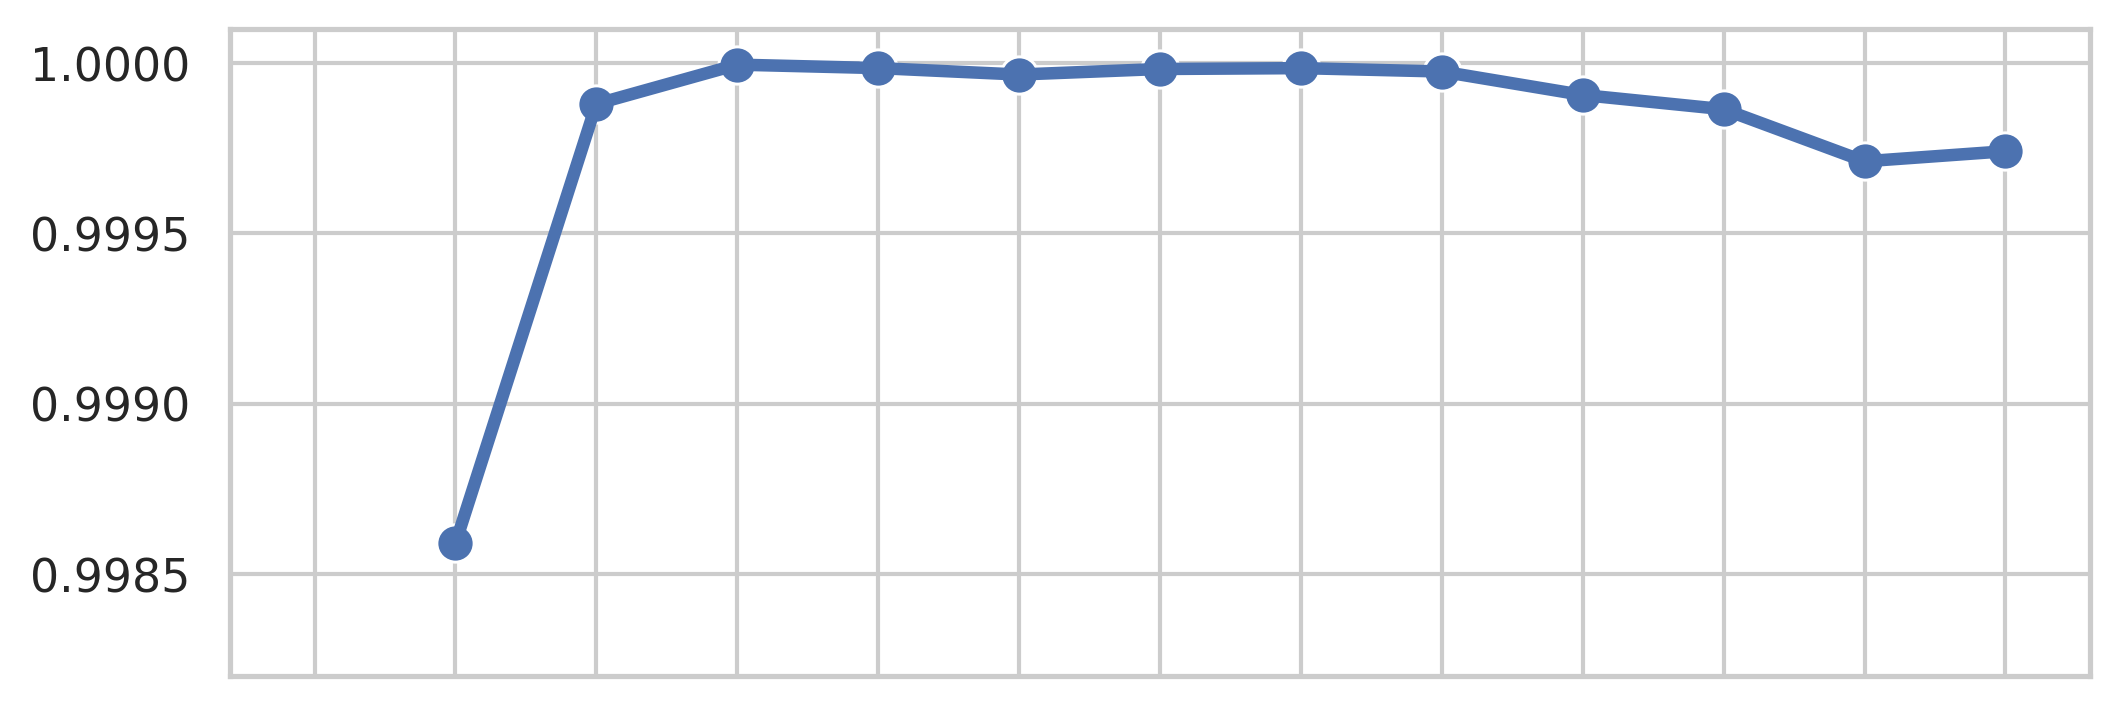

In [81]:
g=sns.scatterplot(data=df, x='Starting time point', y='Pearson R', marker='o', s=80)
g=sns.lineplot(data=df[1:], x='Starting time point', y='Pearson R', linewidth=3)
plt.ylim(0.9982,1.0001)
g.set_xticklabels([])
plt.xlabel('')
plt.ylabel('')

### The UMAP

In [29]:
i=7
ts0=ts[i]
ts1=ts[i+1]
print(ts0)
adata=sc.read(f"{Path}/Comb_anndatas/adata_{ts0}_{ts1}.h5ad")

E7.0
Only considering the two last: ['.25', '.h5ad'].
Only considering the two last: ['.25', '.h5ad'].


In [36]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

In [33]:
sc.pp.neighbors(adata, use_rep='X_pcaS')

In [34]:
sc.tl.umap(adata, random_state=0)

In [50]:
l0=[a.split(':')[0] for a in adata.obs['cell_state']]
l0=['E7.0' if a=='E7' else a for a in l0]

In [51]:
l1=[a.split(':')[1] for a in adata.obs['cell_state']]

In [52]:
adata.obs['cell_state2']=[a+', '+b for a,b in zip(l1,l0)]

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


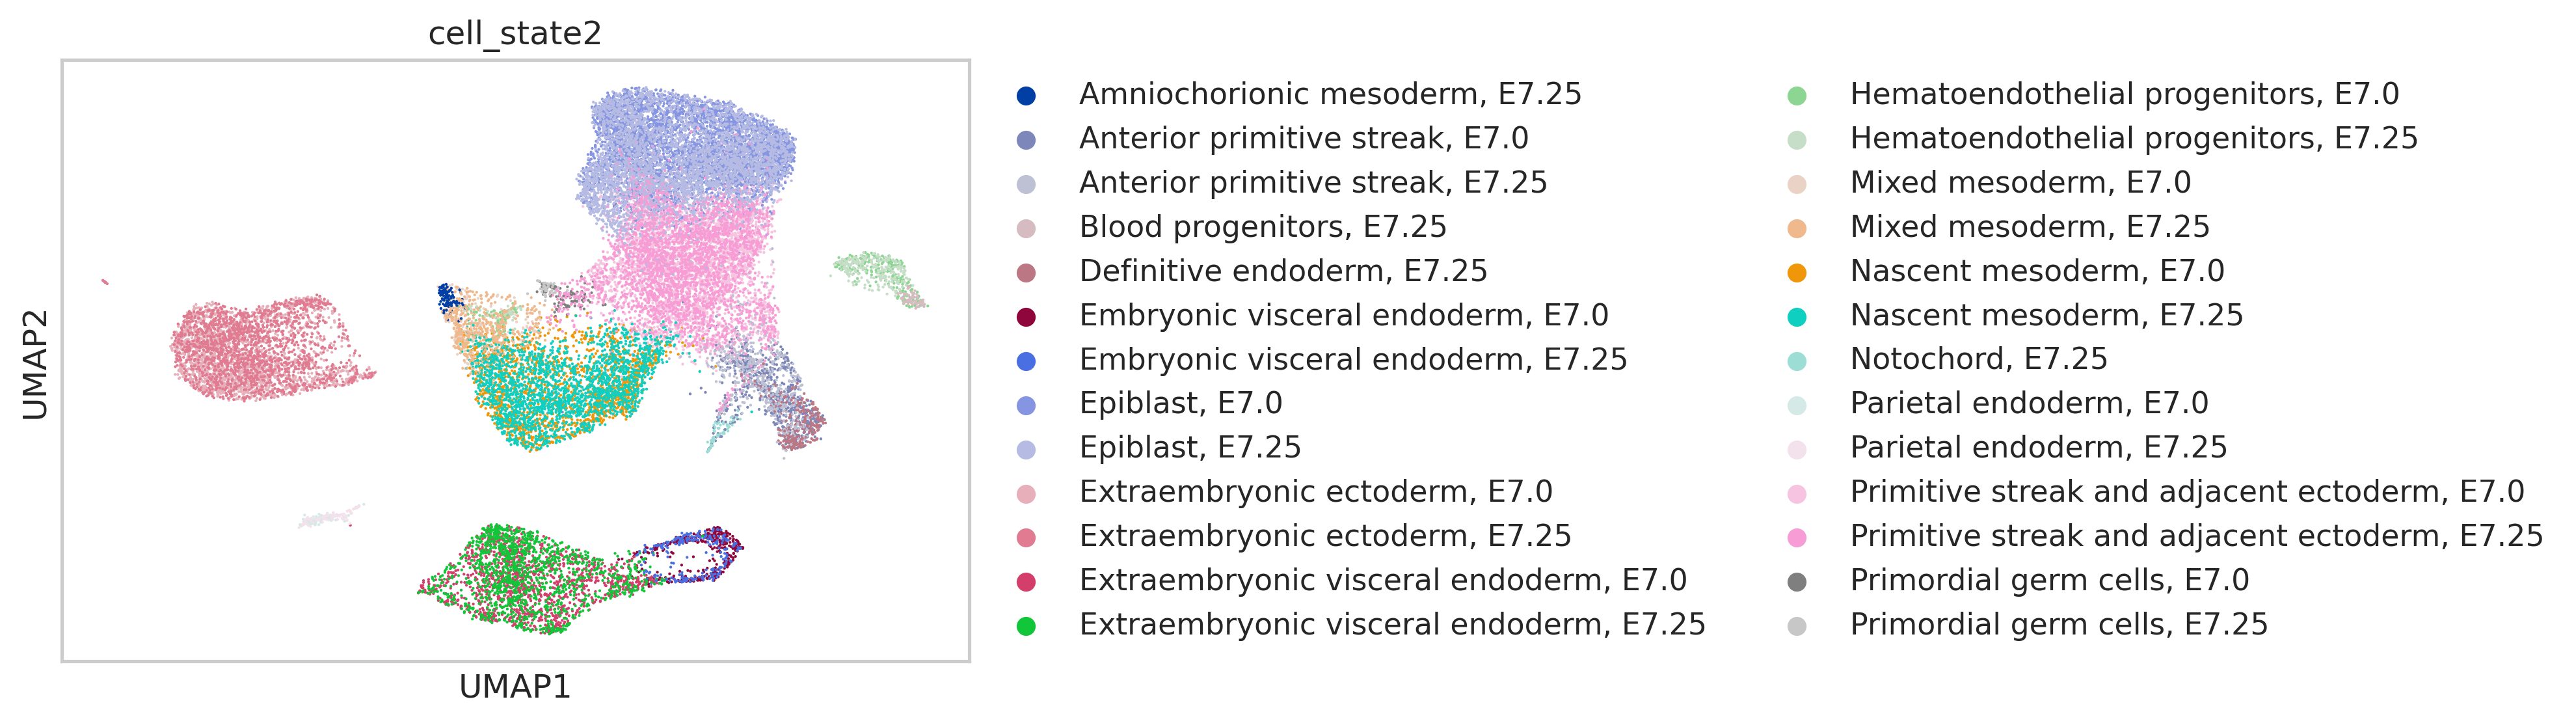

In [92]:
sc.pl.embedding(adata, basis='umap', color='cell_state2')

In [95]:
#colors=adata.uns['cell_state2_colors']
colors=['#023fa5',
 '#7d87b9',
 '#bec1d4',
 '#d6bcc0',
 '#bb7784',
 '#8e063b',
 '#4a6fe3',
 '#8595e1',
 '#b5bbe3',
 '#e6afb9',
 '#e07b91',
 '#d33f6a',
 '#11c638',
 '#8dd593',
 '#c6dec7',
 '#ead3c6',
 '#f0b98d',
 '#ef9708',
 '#0fcfc0',
 '#9cded6',
 '#d5eae7',
 '#f3e1eb',
 '#f6c4e1',
 '#f79cd4',
 '#7f7f7f',
 '#c7c7c7']

In [142]:
# Dict mappting cell type to color
D_col={}


celltypes=sorted(set(adata.obs['cell_state2']))

for i,ct in enumerate(celltypes):
    D_col[ct]=colors[i]
    s0,s1=ct.split(', ')
    if s1=='E7.0':
        s1='E7'
    D_col[s1+':'+s0]=colors[i]

/home/mgander/miniconda3/envs/mc/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


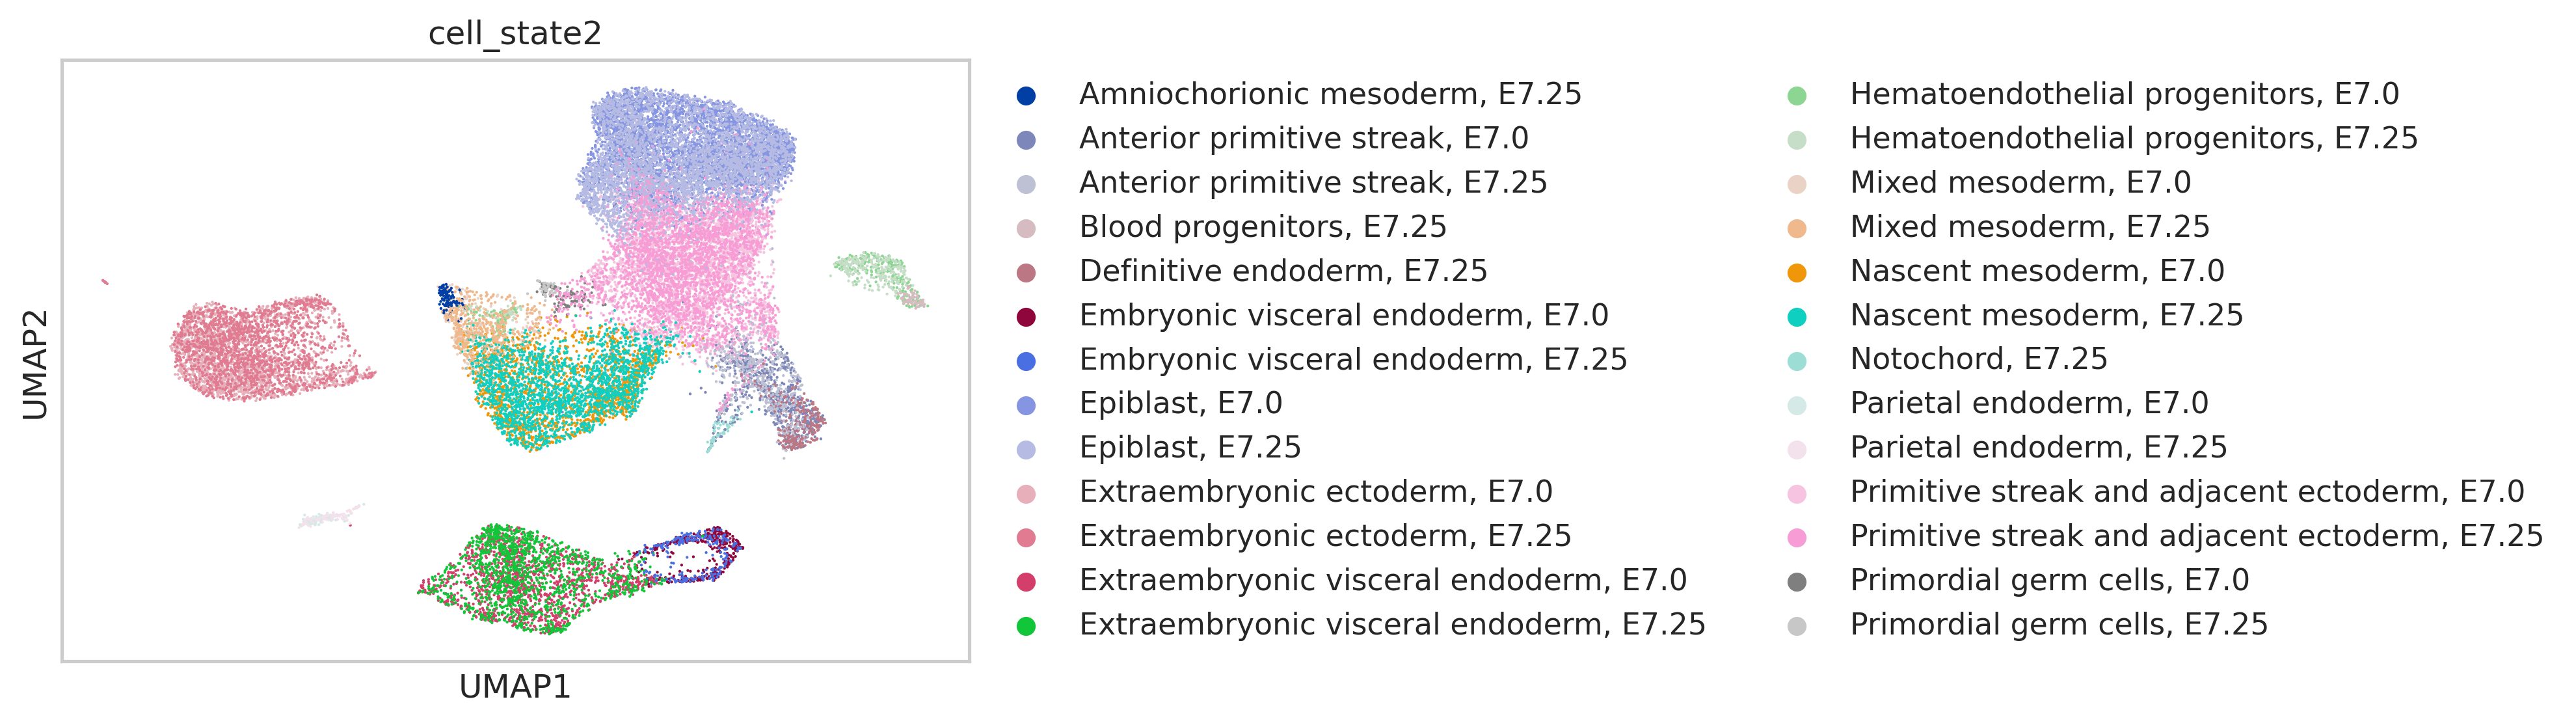

In [101]:
sc.pl.embedding(adata, basis='umap', color='cell_state2', palette=D_col)

In [172]:
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300

In [173]:
Ct=pd.read_pickle(f'{Path}/moscot_maps/WOT_like_CTs/E7.0_E7.25_cell_type_transitions.pkl')
cols=Ct.columns
rows=Ct.index

col_col=[D_col[a] for a in cols]
row_col=[D_col[a] for a in rows]

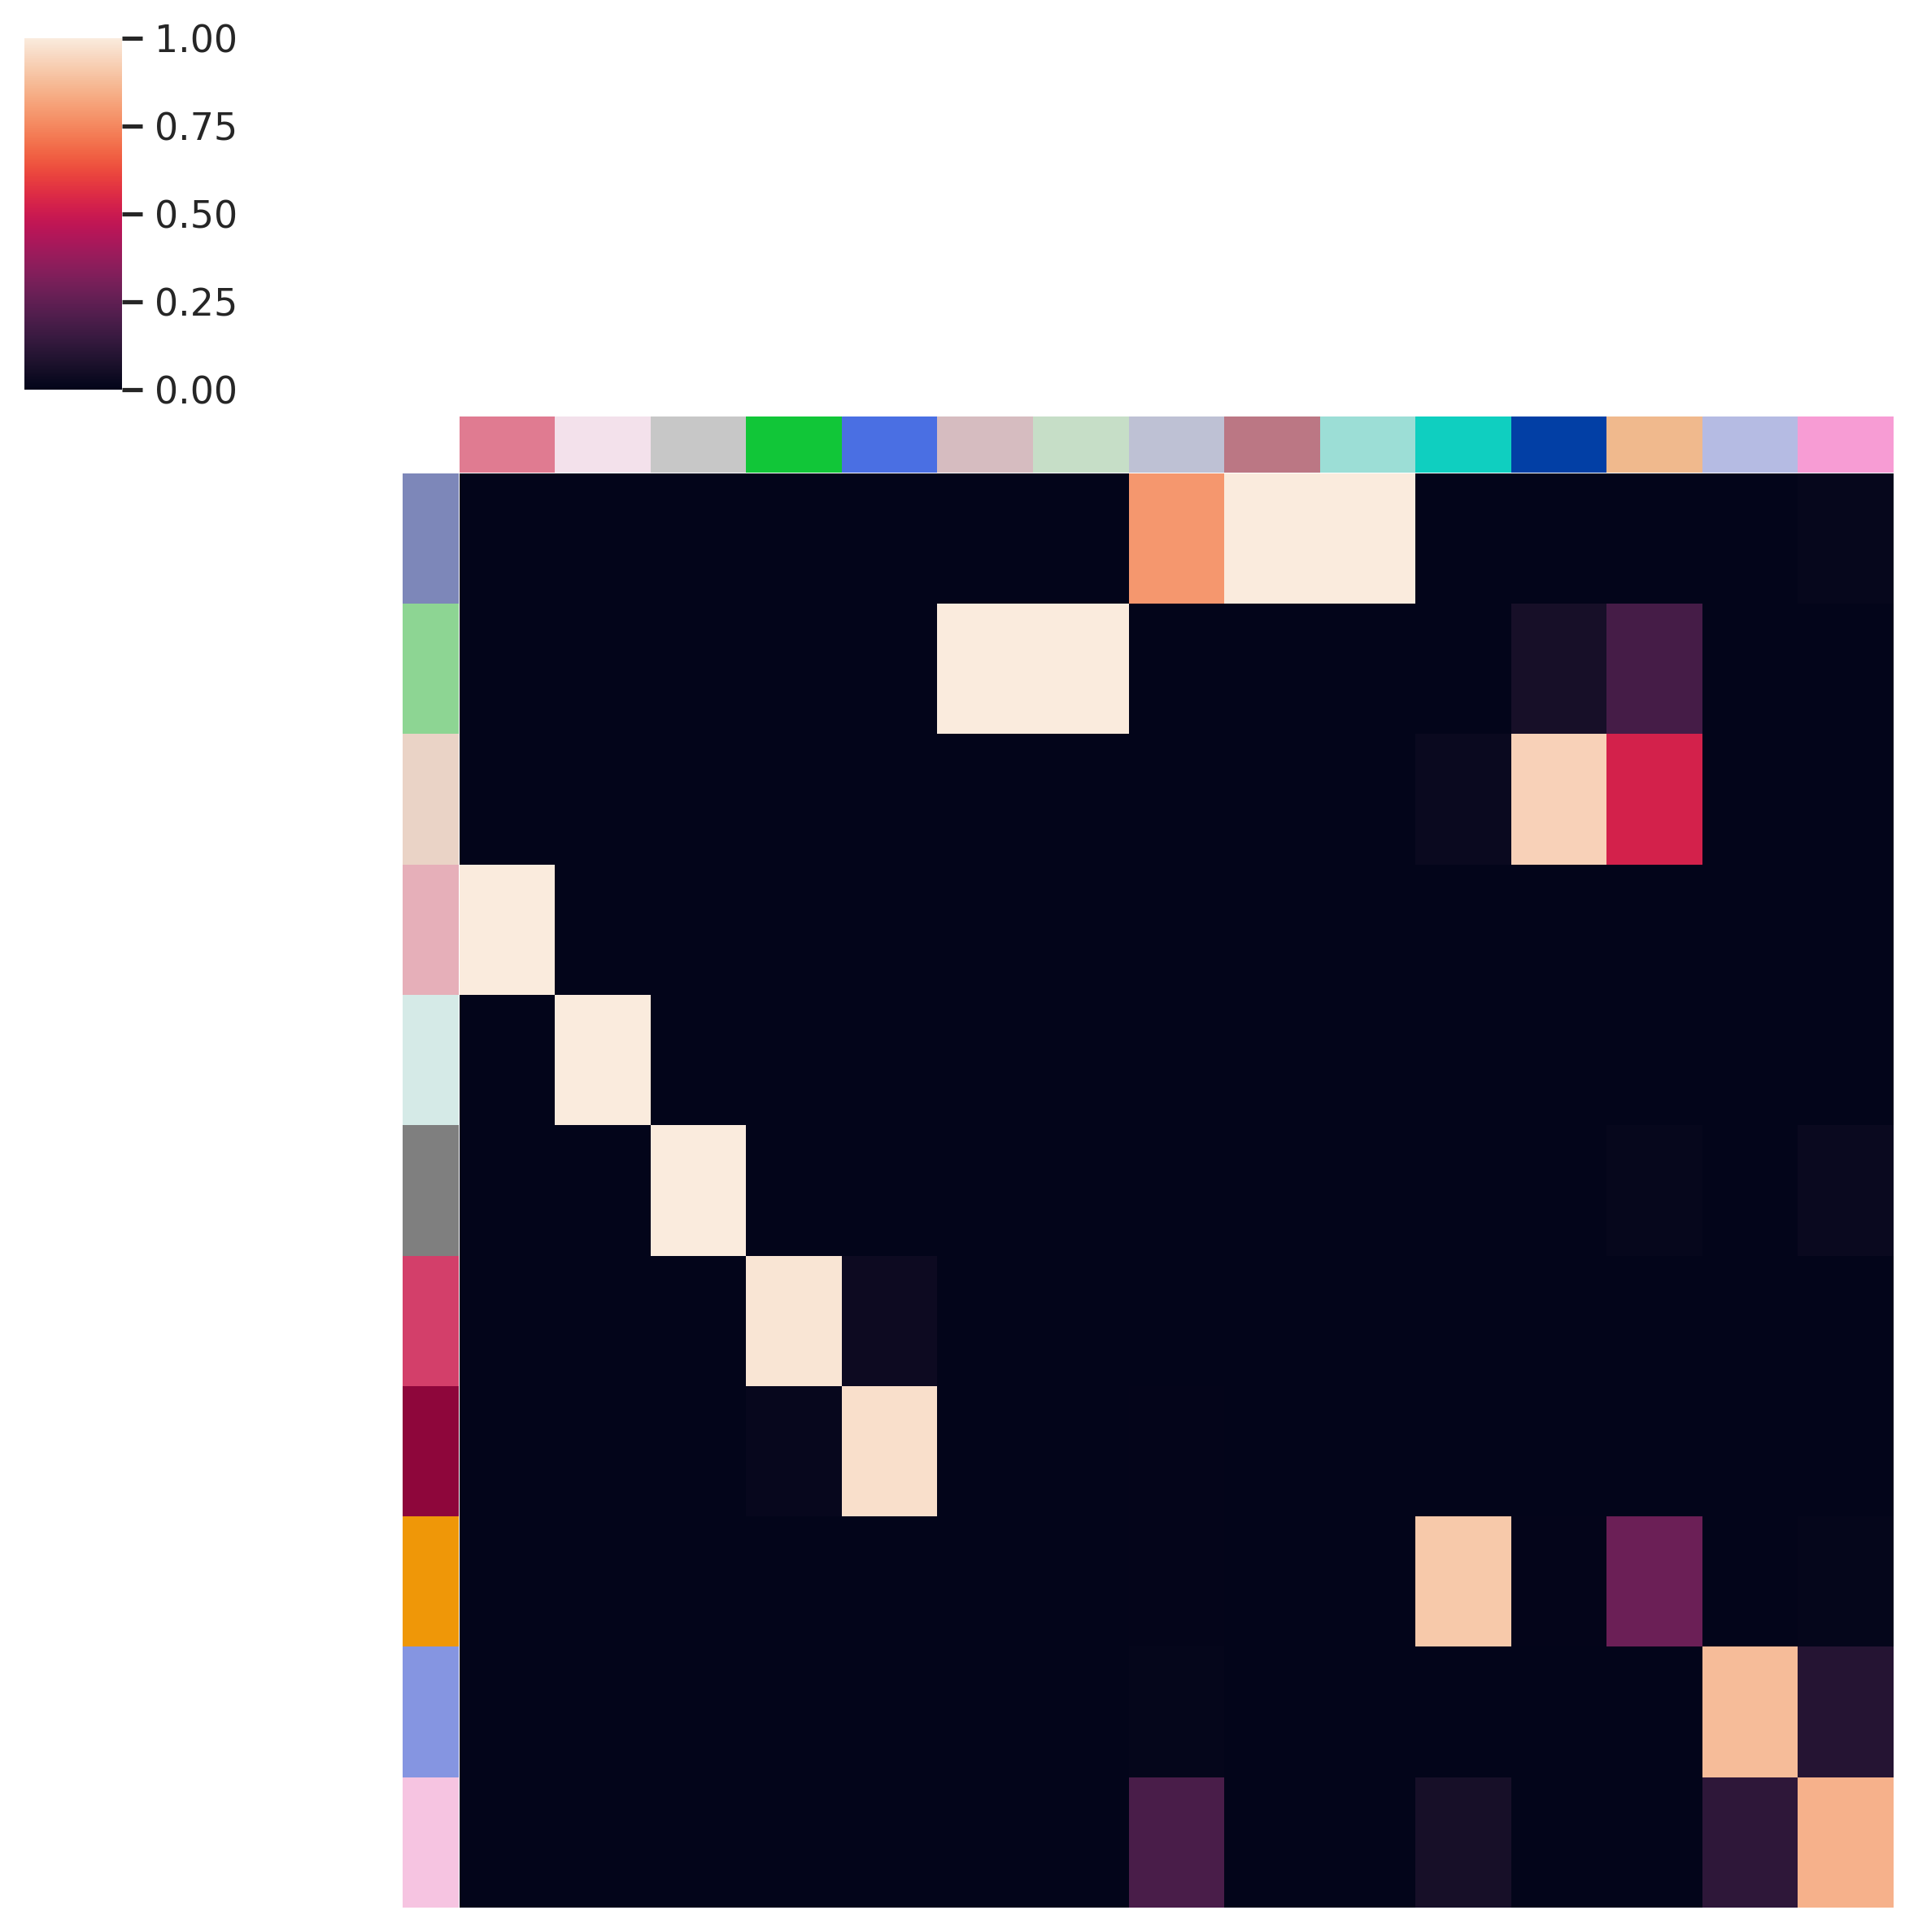

In [181]:
cl=sns.clustermap(data=Ct, row_colors=row_col, col_colors=col_col,
                 yticklabels=False,xticklabels=False, figsize=(8,8))
cl.ax_row_dendrogram.set_visible(False)
cl.ax_col_dendrogram.set_visible(False)

In [ ]:
Ct=pd.read_pickle(f'{Path}/WOT_maps/WOT_like_CTs/E7.0_E7.25_cell_type_transitions.pkl')
cols=Ct.columns
rows=Ct.index

col_col=[D_col[a] for a in cols]
row_col=[D_col[a] for a in rows]

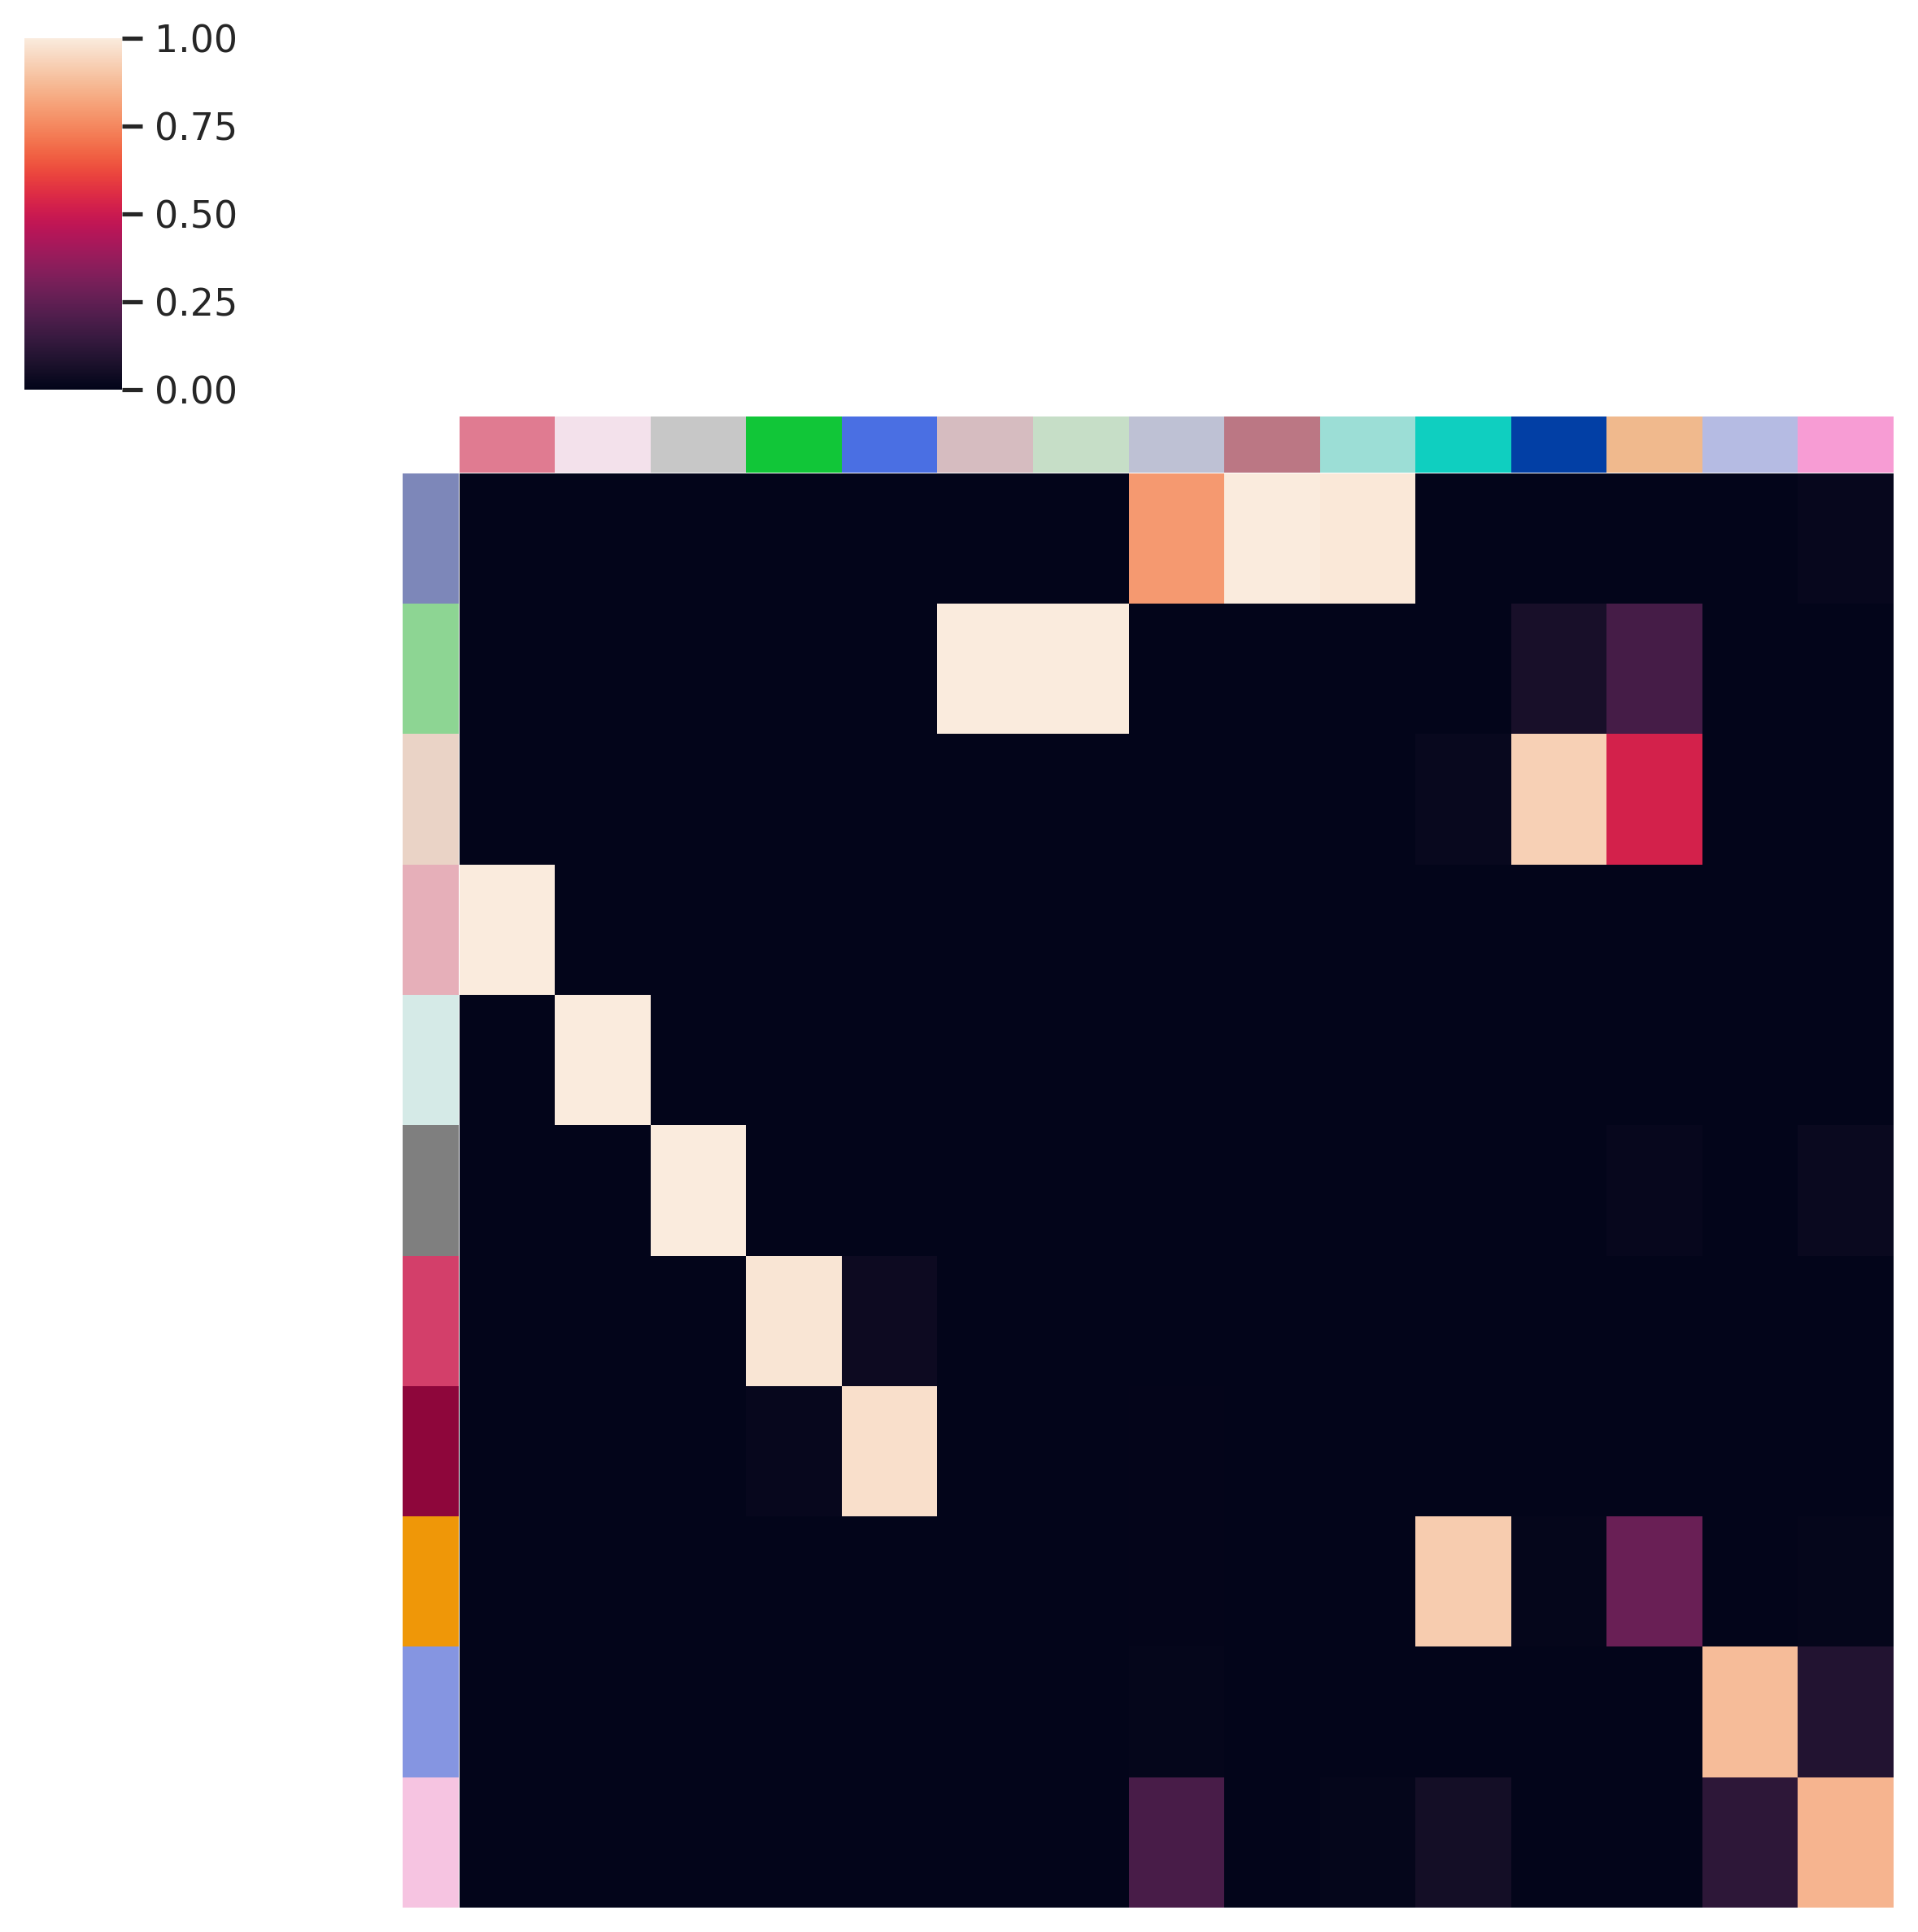

In [182]:
cl=sns.clustermap(data=Ct, row_colors=row_col, col_colors=col_col,
                 yticklabels=False, xticklabels=False, figsize=(8,8))
cl.ax_row_dendrogram.set_visible(False)
cl.ax_col_dendrogram.set_visible(False)

## Evaluate using curated transitions

In [40]:
# Cutoff used to exclude all edges with weight below that
cutoff=0.05

In [41]:
frames=[]

for i in range(13):
    ts0=ts[i]
    ts1=ts[i+1]
    
    CT_WOT=pd.read_pickle(f'{Path}/WOT_maps/WOT_like_CTs/{ts0}_{ts1}_cell_type_transitions.pkl')
    sc0, sc1=c2.evaluate_using_curated_transitions(G, CT_WOT, cutoff)
    frames.append(pd.DataFrame({'Method':['Curated_transitions: WOT'], 'Starting time point':ts0, 'Accuracy':sc0, 'Weight':sc1, 'Algorithm':'WOT', 'Validation':'curated'}))
    sc0, sc1=c2.evaluate_using_germ_layers(Lit, CT_WOT, cutoff)
    frames.append(pd.DataFrame({'Method':['Germ_layer_transitions: WOT'], 'Starting time point':ts0, 'Accuracy':sc0, 'Weight':sc1, 'Algorithm':'WOT', 'Validation':'germ'}))

    
    CT_moscot=pd.read_pickle(f'{Path}/moscot_maps/WOT_like_CTs/{ts0}_{ts1}_cell_type_transitions.pkl')
    sc0, sc1=c2.evaluate_using_curated_transitions(G, CT_moscot, cutoff)
    frames.append(pd.DataFrame({'Method':['Curated_transitions: moscot'], 'Starting time point':ts0, 'Accuracy':sc0, 'Weight':sc1, 'Algorithm':'moscot', 'Validation':'curated'}))
    sc0, sc1=c2.evaluate_using_germ_layers(Lit, CT_moscot, cutoff)
    frames.append(pd.DataFrame({'Method':['Germ_layer_transitions: moscot'], 'Starting time point':ts0, 'Accuracy':sc0, 'Weight':sc1, 'Algorithm':'moscot', 'Validation':'germ'}))
    
df=pd.concat(frames, ignore_index=True)
df

,Method,Starting time point,Accuracy,Weight,Algorithm,Validation
0,Curated_transitions: moscot,E3.5,1.000000,2.000000,moscot,curated
1,Curated_transitions: WOT,E3.5,1.000000,2.000000,WOT,curated
2,Curated_transitions: moscot,E4.5,0.949328,3.999681,moscot,curated
3,Curated_transitions: WOT,E4.5,0.958756,3.964538,WOT,curated
4,Curated_transitions: moscot,E5.25,0.933833,4.935414,moscot,curated
5,Curated_transitions: WOT,E5.25,0.928885,4.943396,WOT,curated
6,Curated_transitions: moscot,E5.5,0.989304,4.888991,moscot,curated
7,Curated_transitions: WOT,E5.5,0.989759,4.887773,WOT,curated
8,Curated_transitions: moscot,E6.25,0.954925,5.930547,moscot,curated
9,Curated_transitions: WOT,E6.25,0.956650,5.936949,WOT,curated


In [42]:
moscot_color=np.array([35,107,157])/255
TOME_color=np.array([225,129,45])/255
WOT_color=np.array([127,152,186])/255

(0.71, 1.02)

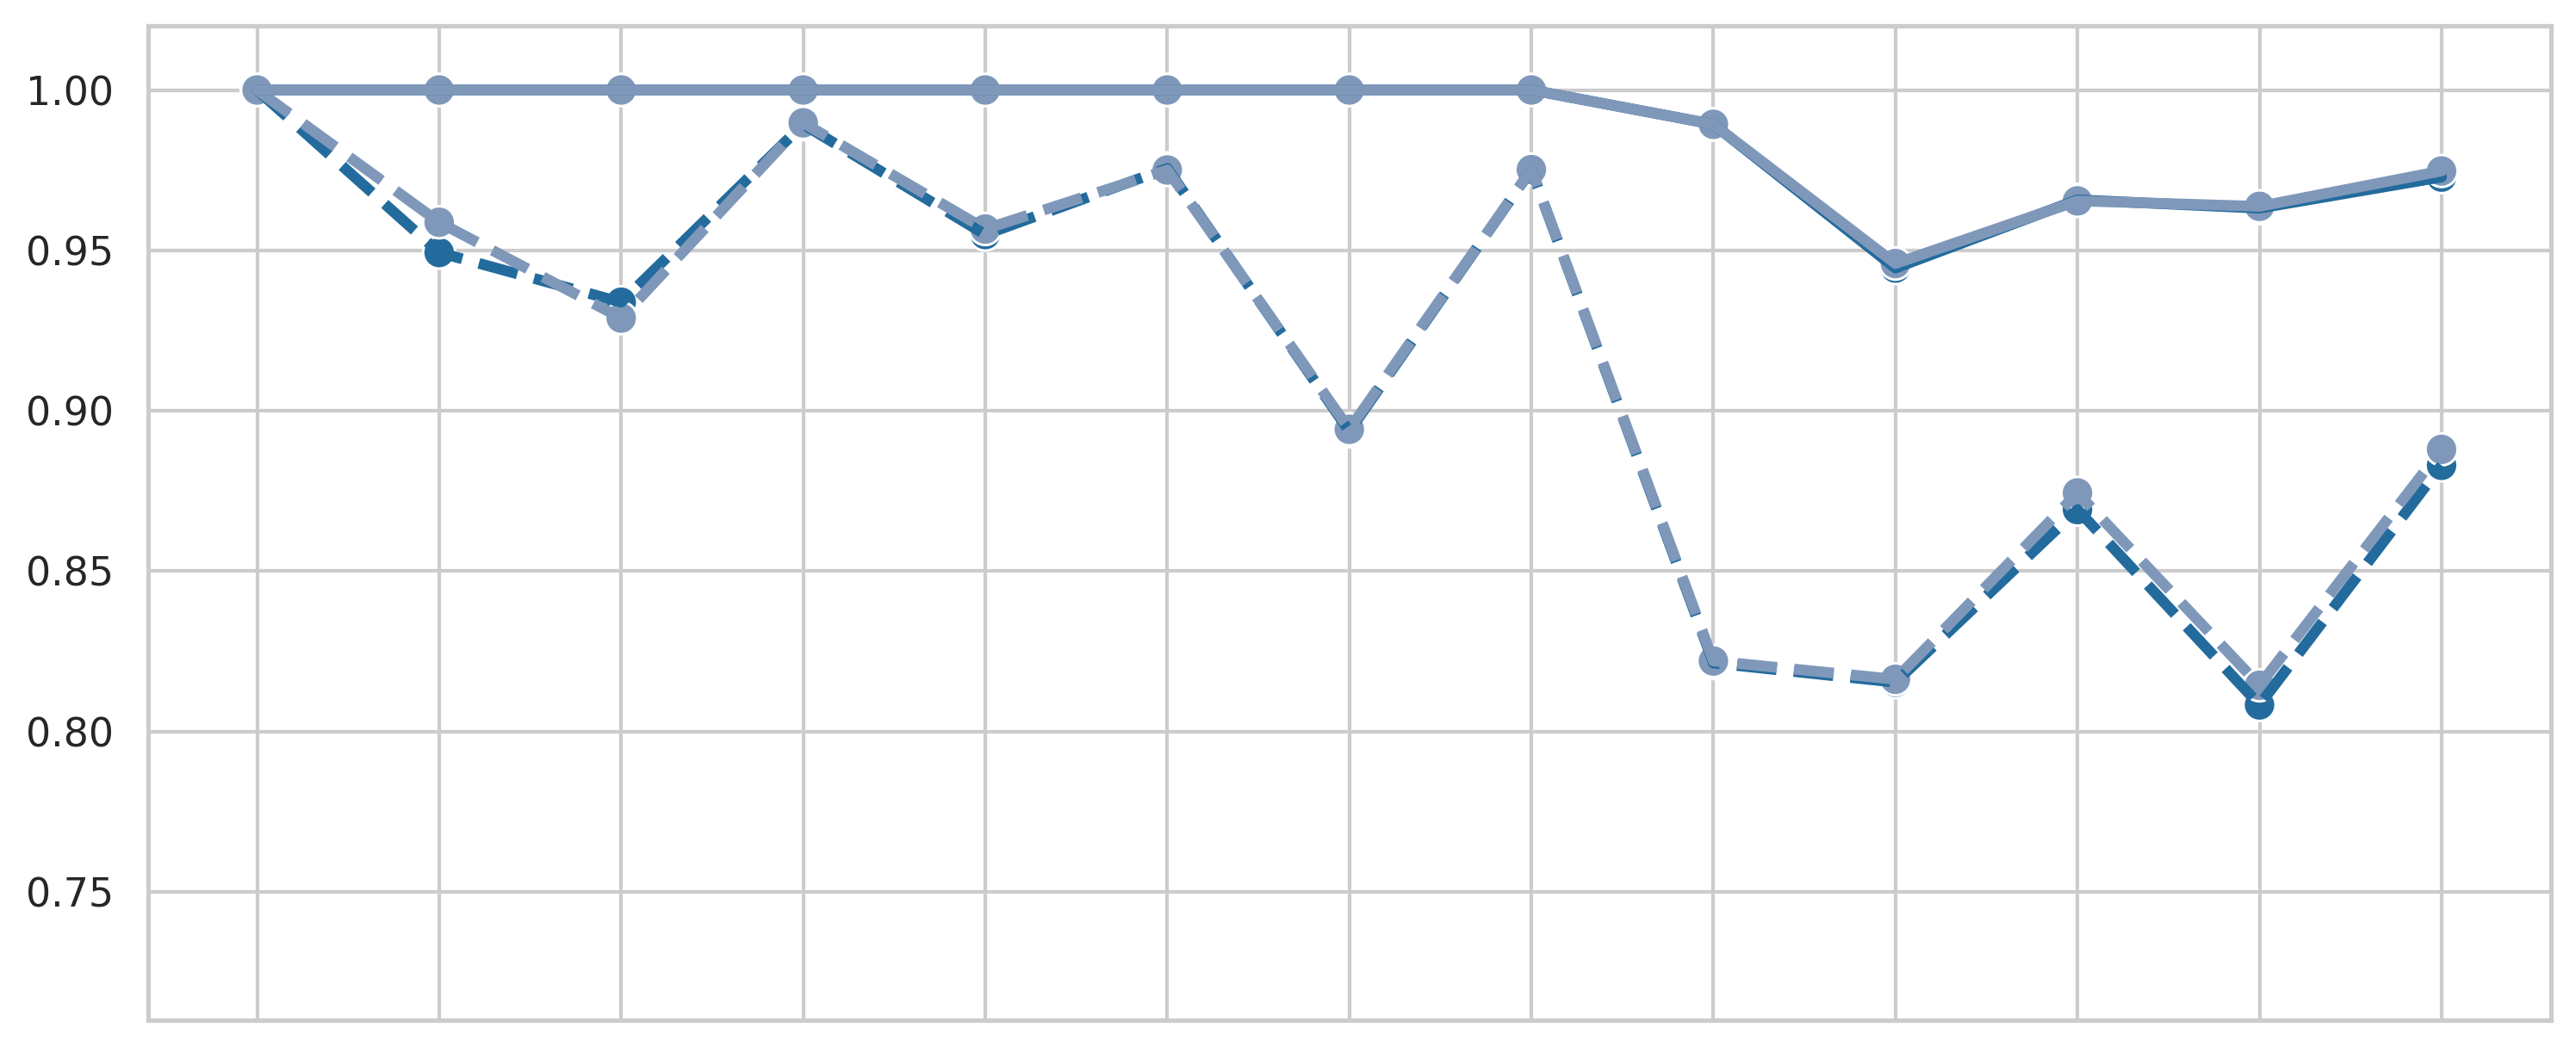

In [59]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300
g0=sns.lineplot(data=df[df['Validation']=='curated'], x='Starting time point', y='Accuracy', hue='Method', linewidth=3,
             palette=[moscot_color,WOT_color], linestyle='--')
sns.lineplot(data=df[df['Validation']=='germ'], x='Starting time point', y='Accuracy', hue='Method', linewidth=3,
             palette=[moscot_color,WOT_color], linestyle='-')


sns.scatterplot(data=df, x='Starting time point', y='Accuracy', marker='o', hue='Method', s=80, legend=False,
               palette=[moscot_color,WOT_color,moscot_color,WOT_color])


if method!='scVI':
    g0.set(xticklabels=[])
    g0.set(xlabel=None)
#g0.set(yticklabels=[])
plt.legend('',frameon=False)
plt.xlabel('')
plt.ylabel('')
plt.ylim(0.71,1.02)
#plt.legend(bbox_to_anchor=(0.13, 0.43), loc='upper left', borderaxespad=0)

### For the barplot

In [46]:
df['time']=[float(a[1:]) for a in df['Starting time point']]

In [47]:
df00=df[(df['Algorithm']=='moscot')&(df['Validation']=='germ')].copy()
df01=df[(df['Algorithm']=='WOT')&(df['Validation']=='germ')].copy()
df10=df[(df['Algorithm']=='moscot')&(df['Validation']=='curated')].copy()
df11=df[(df['Algorithm']=='WOT')&(df['Validation']=='curated')].copy()

In [48]:
pre0='Pre-Gastrulation\n (E3.5 to E6.5) '
pre1='Pre-Gastrulation'
gast0='Gastrulation   \n(E6.5 to E8.5)  '
gast1='Gastrulation'



def weighted_accuracy(df):
    df['Weighted_accuracy']=df['Accuracy']*df['Weight']
    df0=df[df['time']<6.4].copy()
    df1=df[df['time']>6.4].copy()
    
    sc0=df0['Weighted_accuracy'].sum()/df0['Weight'].sum()
    sc1=df1['Weighted_accuracy'].sum()/df1['Weight'].sum()
    
    Df0=pd.DataFrame({'Method':list(df0['Algorithm'].iloc[:2]), 'Stage':['Pregastrulation', 'Gastrulation'],
                      'Accuracy':[sc0, sc1], 'Validation':list(df0['Validation'].iloc[:2])})
    return(Df0)

In [49]:
frames=[]
frames.append(weighted_accuracy(df00))
frames.append(weighted_accuracy(df01))
frames.append(weighted_accuracy(df10))
frames.append(weighted_accuracy(df11))
DF=pd.concat(frames, ignore_index=True)

In [50]:
DF

,Method,Stage,Accuracy,Validation
0,moscot,Pregastrulation,1.000000,germ
1,moscot,Gastrulation,0.969960,germ
2,WOT,Pregastrulation,1.000000,germ
3,WOT,Gastrulation,0.970627,germ
4,moscot,Pregastrulation,0.960981,curated
5,moscot,Gastrulation,0.860185,curated
6,WOT,Pregastrulation,0.962154,curated
7,WOT,Gastrulation,0.863177,curated


(0.75, 1.02)

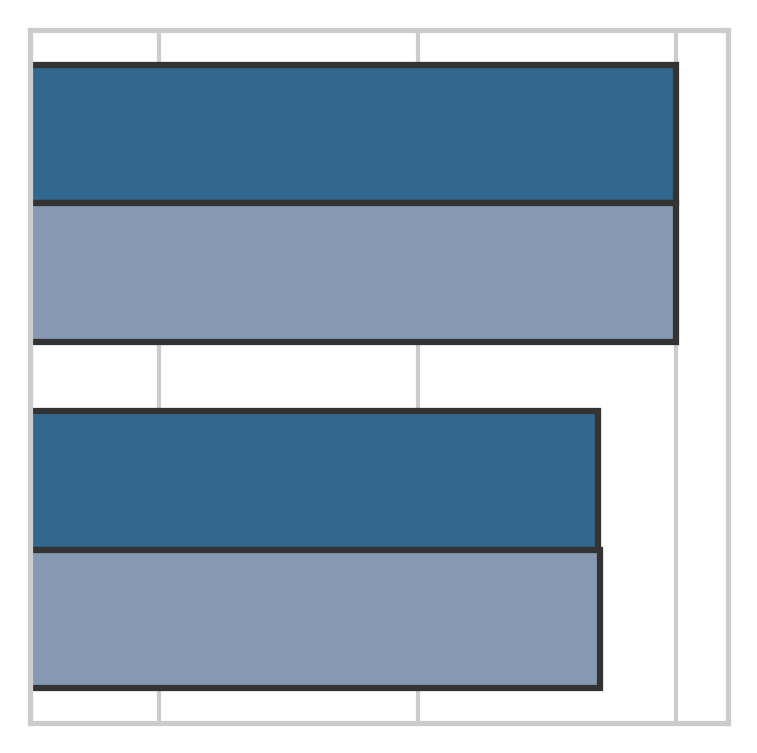

In [53]:
sns.set(rc={'figure.figsize':(3,3)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300


# Germ layer transitions
g0=sns.barplot(data=DF[DF['Validation']=='germ'], x='Accuracy', y="Stage", hue='Method', 
               palette=[moscot_color,WOT_color] , linewidth=1.5, edgecolor='0.2')

plt.xlim(0.75,1.02)

g0.set(xticklabels=[])
g0.set(xlabel=None)
g0.set(ylabel=None)
g0.set(yticklabels=[])
plt.legend('',frameon=False)
plt.xlim()

(0.75, 1.02)

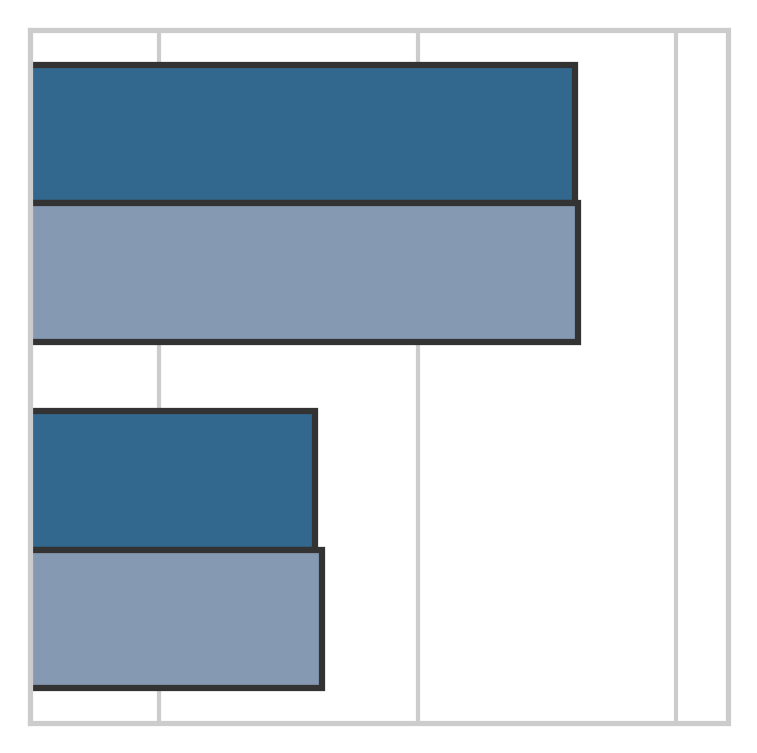

In [55]:
sns.set(rc={'figure.figsize':(3,3)})
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 300


# Curated transitions
g0=sns.barplot(data=DF[DF['Validation']=='curated'], x='Accuracy', y="Stage", hue='Method', 
               palette=[moscot_color,WOT_color] , linewidth=1.5, edgecolor='0.2')

plt.xlim(0.75,1.02)

g0.set(xticklabels=[])
g0.set(xlabel=None)
g0.set(ylabel=None)
g0.set(yticklabels=[])
plt.legend('',frameon=False)
plt.xlim()